In [74]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("pf_suvs_i302_1s2025.csv")

# Eliminar columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

#redondear las columnas numéricas 
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].round(2)
# Mostrar las nuevas columnas

# Limpiar 'Kilómetros': quitar ' km', puntos y convertir a float
df['Kilómetros'] = df['Kilómetros'].astype(str).str.replace('.', '', regex=False)
df['Kilómetros'] = df['Kilómetros'].str.replace(' km', '', regex=False)
df['Kilómetros'] = pd.to_numeric(df['Kilómetros'], errors='coerce')
df.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Precio,Moneda,Descripción,Tipo de vendedor
0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,20500000.0,$,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria
1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,55999900.0,$,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda
2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,28300.0,US$,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular
3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,20090000.0,$,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda
4,Jeep,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,23000.0,US$,•Unico dueño•Todos los services oficiales•Bate...,particular


In [75]:
# Primero normalizamos los valores de moneda
df['Moneda'] = df['Moneda'].replace({'$': 'peso', 'U$S': 'dolar'})

# Tasa de conversión
PESO_A_DOLAR = 1165

# Crear nueva columna con el precio en dólares
df['Precio_usd'] = df.apply(
    lambda row: row['Precio'] / PESO_A_DOLAR if row['Moneda'] == 'peso' else row['Precio'],
    axis=1
)

# (Opcional) Eliminar columnas viejas si ya no las querés
# df = df.drop(columns=['Precio', 'Moneda'])

# Mostrar las primeras filas para verificar
df.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Precio,Moneda,Descripción,Tipo de vendedor,Precio_usd
0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,20500000.0,peso,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524
1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,55999900.0,peso,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691
2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,28300.0,US$,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000
3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,20090000.0,peso,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193
4,Jeep,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,23000.0,US$,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000


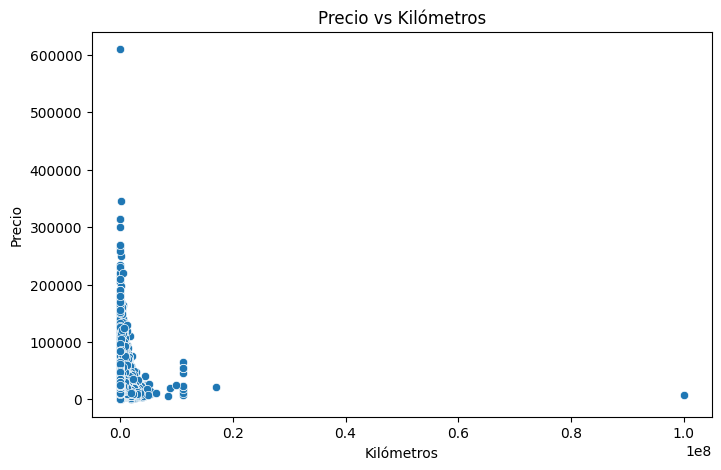

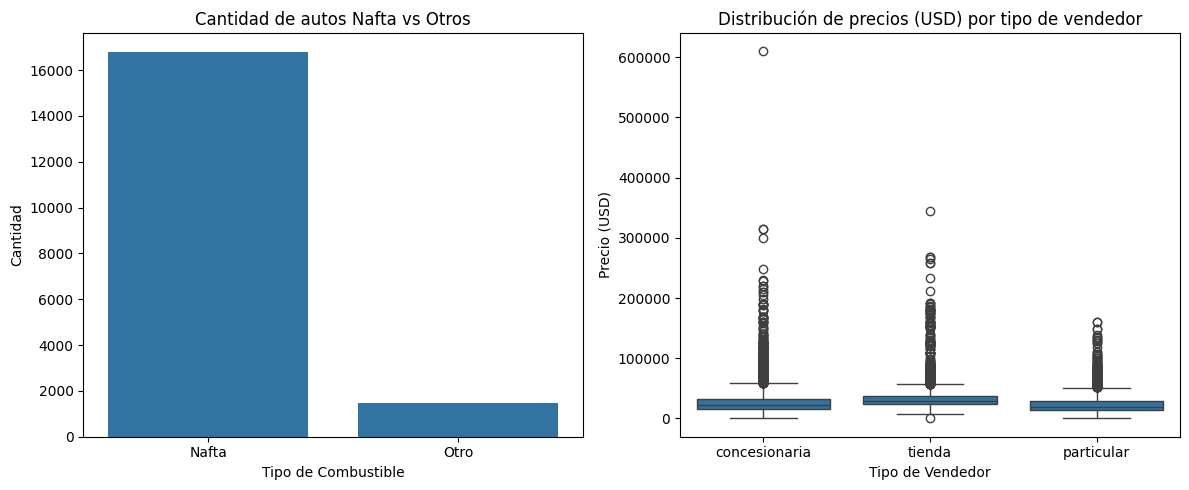

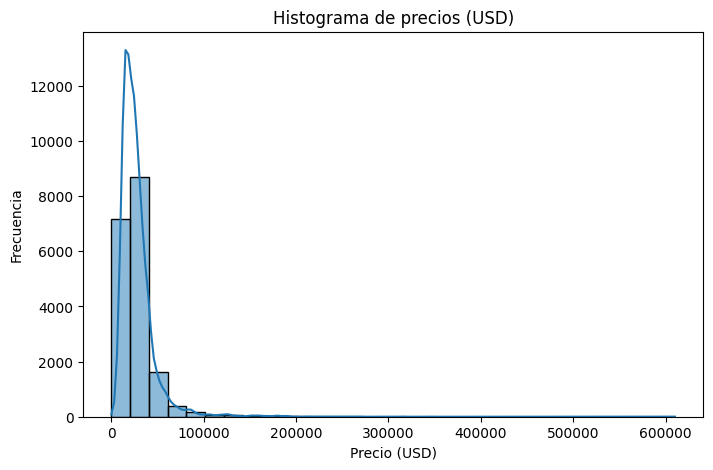

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- GRAFICO 1: Scatter Precio vs Kilómetros ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Kilómetros', y='Precio_usd')
plt.title('Precio vs Kilómetros')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.show()

# --- GRAFICO 2: Boxplot Nafta (incluye Híbrido/Nafta) vs Otros ---

# Crear columna binaria para nafta
df['Combustible_nafta'] = df['Tipo de combustible'].apply(
    lambda x: 'Nafta' if 'nafta' in str(x).lower() else 'Otro'
)

# --- GRAFICOS: Cantidad por tipo de combustible + Boxplot por tipo de vendedor ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Countplot Nafta vs Otros
sns.countplot(data=df, x='Combustible_nafta', ax=axes[0])
axes[0].set_title('Cantidad de autos Nafta vs Otros')
axes[0].set_xlabel('Tipo de Combustible')
axes[0].set_ylabel('Cantidad')

# Gráfico 2: Boxplot Precio_usd por Tipo de vendedor
sns.boxplot(data=df, x='Tipo de vendedor', y='Precio_usd', ax=axes[1])
axes[1].set_title('Distribución de precios (USD) por tipo de vendedor')
axes[1].set_xlabel('Tipo de Vendedor')
axes[1].set_ylabel('Precio (USD)')

plt.tight_layout()
plt.show()
# --- GRAFICO 3: Histograma de precios ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Precio_usd'], bins=30, kde=True)
plt.title('Histograma de precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

In [77]:
#maximo precio en dolares y su marca
max_precio_usd = df['Precio_usd'].max()
marca_max_precio = df.loc[df['Precio_usd'] == max_precio_usd, 'Marca'].values[0]
print(f"La marca del auto con el precio máximo es: {marca_max_precio}")
# Precio promedio en dólares
precio_promedio_usd = df['Precio_usd'].mean()
print(f"El precio promedio en dólares es: {precio_promedio_usd:.2f} USD")
# Precio mínimo en dólares y su marca
min_precio_usd = df['Precio_usd'].min()
marca_min_precio = df.loc[df['Precio_usd'] == min_precio_usd, 'Marca'].values[0]
print(f"El precio mínimo en dólares es: {min_precio_usd:.2f} USD, marca: {marca_min_precio}")

La marca del auto con el precio máximo es: Land Rover
El precio promedio en dólares es: 27852.26 USD
El precio mínimo en dólares es: 102.15 USD, marca: Jeep


In [78]:
def buscar_precio_usd(df, datos_auto):
    """
    Busca autos que coincidan con los campos provistos en datos_auto y devuelve sus precios en dólares.
    Si no encuentra coincidencias, devuelve un mensaje.
    """
    filtro = df.copy()
    for clave, valor in datos_auto.items():
        if clave not in df.columns:
            return f"Columna '{clave}' no encontrada en el dataset"
        filtro = filtro[filtro[clave] == valor]
    
    if not filtro.empty:
        return filtro['Precio_usd'].values.tolist()
    else:
        return "Auto no encontrado en el dataset"
auto = {
    'Marca': 'Ford',
    'Kilómetros': 0.0  # fijate si esto funciona
}
precio_encontrado = buscar_precio_usd(df, auto)
print(f"Precio encontrado: {precio_encontrado}")


Precio encontrado: [51330.47210300429, 41936.48068669528, 51416.309012875536, 39484.978540772536, 39957.08154506438, 39914.16309012876, 42575.107296137336, 53648.0686695279, 40280.896137339056, 40171.673819742486, 36200.0, 41974.24892703863, 48755.36480686695, 40000.858369098714, 42575.107296137336, 42446.35193133047, 44635.19313304721, 35828.58369098712, 40001.71673819742, 34037.15450643777, 50643.776824034336, 40000.0, 40042.91845493562, 51000.0, 41974.24892703863, 39957.08154506438, 42832.61802575107, 45064.377682403436, 37000.0, 54500.0, 42852.01716738197, 42575.107296137336, 41974.24892703863, 51158.7982832618, 46781.11587982833, 42852.01716738197, 39227.4678111588, 41630.90128755365, 39484.978540772536, 40085.83690987124, 42575.107296137336, 41201.71673819742, 35879.82832618026, 51158.7982832618, 39957.08927038626, 39484.978540772536, 39484.978540772536, 46000.0, 40900.0, 47707.124463519314, 57900.0, 40000.0, 47964.80686695279, 41630.90128755365, 41193.1330472103, 39957.081545064

Primeras filas del dataset:
   Unnamed: 0       Marca           Modelo     Año  \
0           0        Ford         Ecosport  2020.0   
1           1  Volkswagen           Tiguan  2024.0   
2           2  Volkswagen  Tiguan Allspace  2019.0   
3           3        Ford         Ecosport  2017.0   
4           4        Jeep          Compass  2021.0   

                       Versión   Color Tipo de combustible  Puertas  \
0      1.5 Freestyle 123cv 4x2  Blanco               Nafta      5.0   
1              LIFE 350 TSI 4M   Negro               Nafta      5.0   
2  1.4 Tsi Trendline 150cv Dsg   Negro               Nafta      5.0   
3       1.5 Titanium 123Cv 4X2  Blanco               Nafta      5.0   
4                 2.4 Sport At     NaN               Nafta      5.0   

             Transmisión                  Motor Tipo de carrocería  \
0                 Manual                    1.5                SUV   
1  Automática secuencial  2.0 L 230 CV  350 TSI                SUV   
2         

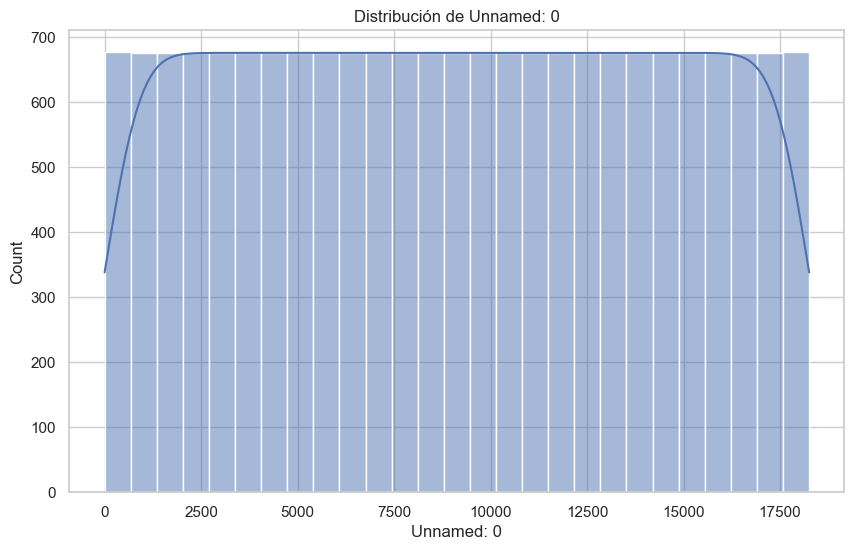

In [ ]:
# --- Importar librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuraciones de visualización ---
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --- Cargar el dataset ---
df = pd.read_csv("dataset.csv")

# --- Vista general de los datos ---
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))

# --- Valores faltantes ---
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# --- Variables categóricas: valores únicos ---
print("\nValores únicos por columna categórica:")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

# --- Distribución de variables numéricas ---
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# --- Boxplots para detectar outliers ---
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()




In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Copia de trabajo ---
df_prep = pd.read_csv("dataset.csv")

# 1. Columna 'Con cámara de retroceso'  →  tres valores explícitos
df_prep['Con cámara de retroceso'] = (
    df_prep['Con cámara de retroceso']
        .str.strip().str.lower()        # limpieza básica
        .map({'sí': 'sí', 'no': 'no'})  # normaliza si venían acentos/casings
        .fillna('sin_info')             # gran masa de NaNs queda como 'sin_info'
)

# 2. Rellenar categóricas de baja proporción de NaNs con 'desconocido'
categ_baja_nan = ['Color', 'Transmisión', 'Motor']
for col in categ_baja_nan:
    df_prep[col] = (
        df_prep[col]
        .astype(str)        # por si hay mezclas numéricas
        .str.strip().str.lower()
        .fillna('desconocido')
        .replace({'nan': 'desconocido', 'none': 'desconocido'})
    )

# 3. Eliminar columna índice sobrante
if 'Unnamed: 0' in df_prep.columns:
    df_prep = df_prep.drop(columns='Unnamed: 0')

# 4. (Opcional) verificar que ya no existan NaNs
print(df_prep.isnull().sum())


Marca                      0
Modelo                     0
Año                        0
Versión                    0
Color                      0
Tipo de combustible        0
Puertas                    0
Transmisión                0
Motor                      0
Tipo de carrocería         0
Con cámara de retroceso    0
Kilómetros                 0
Título                     0
Precio                     0
Moneda                     0
Descripción                0
Tipo de vendedor           0
dtype: int64


In [38]:
print("\nEstadísticas descriptivas:")
print(df_prep.describe(include='all'))


Estadísticas descriptivas:
        Marca    Modelo            Año            Versión  Color  \
count   18254     18254   18254.000000              18254  18254   
unique     47       137            NaN               2072     65   
top      Ford  Ecosport            NaN  1.6 Exclusive Cvt   gris   
freq     2161      1569            NaN                320   5468   
mean      NaN       NaN    2042.796209                NaN    NaN   
std       NaN       NaN    3217.260996                NaN    NaN   
min       NaN       NaN    1981.000000                NaN    NaN   
25%       NaN       NaN    2016.000000                NaN    NaN   
50%       NaN       NaN    2019.000000                NaN    NaN   
75%       NaN       NaN    2024.000000                NaN    NaN   
max       NaN       NaN  436694.000000                NaN    NaN   

       Tipo de combustible       Puertas Transmisión  Motor  \
count                18254  18254.000000       18254  18254   
unique                   8   

In [39]:
df_prep.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Precio,Moneda,Descripción,Tipo de vendedor
0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,blanco,Nafta,5.0,manual,1.5,SUV,no,64000.0,Ford Ecosport 1.5 Freestyle 123cv 4x2,20500000.0,$,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria
1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,negro,Nafta,5.0,automática secuencial,2.0 l 230 cv 350 tsi,SUV,sí,0.0,Tiguan Life 350 Tsi 4m Ar,55999900.0,$,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda
2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,negro,Nafta,5.0,automática,1.4,SUV,sin_info,65300.0,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,28300.0,US$,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular
3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,blanco,Nafta,5.0,manual,1.5,SUV,sin_info,76898.0,Ford Ecosport 1.5 Titanium 123Cv 4X2,20090000.0,$,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda
4,Jeep,Compass,2021.0,2.4 Sport At,desconocido,Nafta,5.0,automática,2.4,SUV,sin_info,109000.0,Jeep Compass 2.4 Sport At,23000.0,US$,•Unico dueño•Todos los services oficiales•Bate...,particular


In [40]:
# Primero normalizamos los valores de moneda
df_prep['Moneda'] = df_prep['Moneda'].replace({'$': 'peso', 'U$S': 'dolar'})

# Tasa de conversión
PESO_A_DOLAR = 1165

# Crear nueva columna con el precio en dólares
df_prep['Precio_usd'] = df_prep.apply(
    lambda row: row['Precio'] / PESO_A_DOLAR if row['Moneda'] == 'peso' else row['Precio'],
    axis=1
)

In [41]:
# --- Copia del DataFrame original, por si querés preservar el original ---
df_limpio = df_prep.copy()

# --- Columnas a eliminar ---
columnas_a_eliminar = ['Título', 'Descripción', 'Tipo de carrocería', 'Versión','Color','Motor','Modelo','Precio','Moneda']

# --- Eliminar columnas ---
df_limpio = df_limpio.drop(columns=columnas_a_eliminar, errors='ignore')

# --- Verificar que se eliminaron ---
print("Columnas actuales del dataset:")
print(df_limpio.columns)


Columnas actuales del dataset:
Index(['Marca', 'Año', 'Tipo de combustible', 'Puertas', 'Transmisión',
       'Con cámara de retroceso', 'Kilómetros', 'Tipo de vendedor',
       'Precio_usd'],
      dtype='object')


In [47]:
df_limpio.head(60)

,Marca,Año,Tipo de combustible,Puertas,Transmisión,Con cámara de retroceso,Kilómetros,Tipo de vendedor,Precio_usd
0,Ford,2020.0,Nafta,5.0,manual,no,64000.0,concesionaria,17596.566524
1,Volkswagen,2024.0,Nafta,5.0,automática secuencial,sí,0.0,tienda,48068.583691
2,Volkswagen,2019.0,Nafta,5.0,automática,sin_info,65300.0,particular,28300.000000
3,Ford,2017.0,Nafta,5.0,manual,sin_info,76898.0,tienda,17244.635193
4,Jeep,2021.0,Nafta,5.0,automática,sin_info,109000.0,particular,23000.000000
5,BAIC,2024.0,Nafta,5.0,automática,sí,0.0,concesionaria,39700.000000
6,Jeep,2007.0,Nafta,5.0,automática,sin_info,170000.0,concesionaria,11000.000000
7,Kia,2013.0,Nafta/GNC,5.0,automática,sí,149000.0,particular,18884.120172
8,Hyundai,2018.0,Nafta,5.0,automática,sí,98000.0,concesionaria,26000.000000
9,Porsche,2013.0,Nafta,5.0,automática,sin_info,133000.0,concesionaria,45000.000000


In [48]:
import pandas as pd

# --- Copiamos el DataFrame original de trabajo ---
df_modelo = df_limpio.copy()

# --- Seleccionar columnas categóricas para codificar ---
columnas_categoricas = ['Marca', 'Tipo de combustible', 'Transmisión',
                        'Con cámara de retroceso', 'Tipo de vendedor']

# --- Aplicar one-hot encoding ---
df_modelo = pd.get_dummies(df_modelo, columns=columnas_categoricas, drop_first=True)

# --- Verificar dimensiones y columnas resultantes ---
print(f"Shape final del dataset: {df_modelo.shape}")
print("Primeras columnas codificadas:")
print(df_modelo.columns[:15])


Shape final del dataset: (18254, 65)
Primeras columnas codificadas:
Index(['Año', 'Puertas', 'Kilómetros', 'Precio_usd', 'Marca_Audi',
       'Marca_BAIC', 'Marca_BMW', 'Marca_Chery', 'Marca_Chevrolet',
       'Marca_Citroën', 'Marca_D.S.', 'Marca_DS AUTOMOBILES', 'Marca_Daihatsu',
       'Marca_Dodge', 'Marca_D·S'],
      dtype='object')


In [67]:
# Remueve puntos (separadores de miles) y convierte a número
df_modelo['Kilómetros_num'] = (
    df_modelo['Kilómetros']
    .astype(str)
    .str.replace('.', '', regex=False)     # quita separador de miles
    .str.extract(r'(\d+)')                 # extrae el número
    .astype(float)
)

# Verificar si hubo errores
print(df_modelo[['Kilómetros', 'Kilómetros_num']].sample(10))
# --- Eliminar columna original de 'Kilómetros' ---
df_modelo = df_modelo.drop(columns=['Kilómetros'], errors='ignore')

       Kilómetros  Kilómetros_num
2179      59000.0        590000.0
5484     120000.0       1200000.0
9918          0.0             0.0
1997      93000.0        930000.0
15212    175000.0       1750000.0
1125      55481.0        554810.0
3754     150000.0       1500000.0
14792         0.0             0.0
1248      52100.0        521000.0
18103  138.000 km        138000.0


In [70]:
print("\nEstadísticas descriptivas:")
print(df_modelo.describe(include='all'))


Estadísticas descriptivas:
                  Año       Puertas     Precio_usd Marca_Audi Marca_BAIC  \
count    18254.000000  18254.000000   18254.000000      18254      18254   
unique            NaN           NaN            NaN          2          2   
top               NaN           NaN            NaN      False      False   
freq              NaN           NaN            NaN      17725      18089   
mean      2042.796209     18.167306   27852.262131        NaN        NaN   
std       3217.260996    891.766121   20317.490113        NaN        NaN   
min       1981.000000      2.000000     102.145923        NaN        NaN   
25%       2016.000000      5.000000   16309.012876        NaN        NaN   
50%       2019.000000      5.000000   23690.987124        NaN        NaN   
75%       2024.000000      5.000000   32698.819742        NaN        NaN   
max     436694.000000  60252.000000  610000.000000        NaN        NaN   

       Marca_BMW Marca_Chery Marca_Chevrolet Marca_Citroën 